# GAATs (Knowledge Graph Embedding via Graph Attenuated Attention Networks)

Mạng đò thị chú ý

### ABSTRACT 

Knowledge graphs contain a wealth of real-world knowledge that can provide strong support for artificial intelligence applications. Much progress has been made in knowledge graph completion, stateof-the-art models are based on graph convolutional neural networks. These models automatically extract features, in combination with the features of the graph model, to generate feature embeddings with a strong expressive ability. However, these methods assign the same weights on the relation path in the knowledge graph and ignore the rich information presented in neighbor nodes, which result in incomplete mining of triplefeatures.Tothisend,weproposeGraphAttenuatedAttentionnetworks(GAATs),anovelrepresentation method, which integrates an attenuated attention mechanism to assign different weight in different relation path and acquire the information from the neighborhoods. As a result, entities and relations can be learned in any neighbors. Our empirical research provides insight into the effectiveness of the attenuated attentionbased models, and we show significant improvement compared to the state-of-the-art methods on two benchmark datasets WN18RR and FB15k-237.

### Dẫn nhập

Đồ thị tri thức chứa đầy đủ những kiến thức về thế giới thực mà có thể hỗ trợ mạnh mẽ cho những ứng dụng trí tuệ nhân tạo. Đã có nhiều tiền bộ trong quá trình hoàn thành đô thị tri thức. mô hình state-of-the-art là dựa vào đồ thị CNN. Những mô hình này tự động trích xuất đặc trưng, phối hợp với những đặc trưng của mô hình đồ thị, để generate những đặc trưng nhúng với khả năng ấn tượng. Tuy nhiên những phương pháp này gán cùng một trong số trong path relation (dường dẫn mối quan hệ) trong đồ thị tính toán, và loại bỏ những node hàng xóm (neighbor nodes) giàu thông tin biểu diễn, mà kết quả thì không khai toán một cách hoàn thiện bộ ba đặc trưng (triple features). Đến cuối cùng, chúng tôi đề xuất Graph Attenuated Attention networks(GAATs Đồ thị mạng suy giảm chú ý), một phương pháp biểu diễn mới lạ mà có thể tích hợp một cơ chế suy giảm chú ý (attenuated attention mechanism) để gán các trong số khác nhau vào những mối quan hệ dường dẫn khác nhau (different relation path) và thu được những thông tin những những người hàng xóm (neighborhoods). Kết quả là, thực thể và mối quan hệ có thể học ở bất kỳ hàng xóm nào. Kinh nghiệm nghiên cứu của chúng tôi cung cấp một cái nhần sắc(insight) vào sự hiệu quả của mô hình dựa trên chú ý (attenuated attention-based models), và chúng tôi chỉ ra sự tiến bộ đáng kể so với những phương pháp state-of-the-art ở hai bộ dữ liệu chuẩn WN18RR và FB15k-237.

## 1. INTRODUCTION

The knowledge graph (KG) is a graph-based data structure composed of ‘‘node-edge-node’’ that represents a semantic network. The node represents a ‘‘concept’’ or ‘‘entity’’, and the edge represents a relation between two entities. For example, in Figure 1, a triple (Joe Russo, born_in, Cleveland) is represented as two entities: Joe Russo and Cleveland with a relation born_in linking them. Knowledge graphs are used to describe concepts, entities, and the rich relations between them in the real world. At present, knowledge graphs have been widely used in finance [1], medical [2], semantic search [3], and other fields.

However, the use of knowledge graphs is often limited due to the deficiency in relations arising from incomplete
processing data. It is difficult to complete the missing knowledge by means of extraction or fusion because of the sparseness of the data. The completion of true relations, namely knowledge graph completion, remains an active research area. For example, in Figure 1, given triples (Anthony Russo, brother_of, Joe Russo), (Joe Russo, born_in, Cleveland), (Cleveland, city_of, Ohio) and (Ohio, state_of, USA), the inference (Anthony Russo,nationality,USA) should stands.State-of-the-art methods aim to match entities and relations to low-dimensional continuous vector spaces to characterize their latent semantic features

## I. Giới thiệu

Đồ thị tri thức là một đồ thi dựa trên cấu trúc dữ liệu kết hợp của "node-cạnh-node" mà thể hiện mạng lưới ngữ nghĩa. Những node biểu diễn "nội dung"(concept) hoặc thực thể, và cạnh biểu diễn mối quan hệ giữa hai thực thể. Ví dụ hình 1, một bộ ba gồm (Joe Russo, born_in, Cleveland) là một biểu diễn của hai thực thể. Joe Russo và Cleverland với một mối quan hệ sinh_ra được liên kết chúng. Đồ thị tính toán được sử dụng để mô tả nội dung, thực thể và tích trữ ([rich]([https://www.oxfordlearnersdictionaries.com/definition/english/rich?q=rich])) mối quan hệ giữa chúng trong thế giới thực. Hiện tại, đồ thị tính toán đã được sử dụng rộng rãi trong tài chính, y học và tìm kiếm ngữ nghĩa và những lĩnh vực khác. 

Tuy nhiên sử dụng đồ thị tính toán thường giới hạn theo deficiency(khuyết điểm) của các mối quan hệ từ (arising - tạo lên) quá trình xử lý dữ liệu. Thật là khó để hoàn thiện tri thức bằng cách (by mean) trích xuất hoặc dung hòa (fusion) bởi vì sự phân bố thưa thớt của dữ liệu (sparseness of the data). Sự hoàn thiện những mối quan hệ đúng, được gọi là knowledge graph completion (hoàn thiện đồ thị trức) vẫn còn là active research area(khu vực nghiên cứu năng động). Ví dụ trong hình I. ta có những bộ ba

*(Anthony Russo, brother_of, Joe Russo)*

*(Joe Russo, born_in, Cleveland)*

*(Cleveland, city_of, Ohio)*

và *(Ohio, state_of, USA)*

sự suy luận (Anthony Russo,nationality,USA) là phải được chọn ([stands](https://www.oxfordlearnersdictionaries.com/definition/english/stand_1?q=stands)). Phương pháp mới nhất hiện này cố gắng để(aim)  nối những thực thể và những mối quan hệ vào một **low-dimensional continuous vector spaces**(không gian vector liên tục chiều thấp) để characterize (đặc tính hóa) latent semantic features (những đặc trưng ngữ nghĩa ngầm)

The most advanced knowledge embedding approach is knowledge graph representation learning, which mainly categories into tensor decomposition, translational model, and neural networks model. While statistical models need to capture the joint distribution triple features between multiple atomic, which will cause the exponential growth of feature space, the representation learning maps features to the distributed space so that the complex relations are decoupled and dimensionality disaster problem is alleviated. In addition, the data sparsity is prominent in knowledge graph, while the representation learning fills the sparse matrix by numerical calculation, which solves the data sparsity problem to some extent. Finally, representation learning allows symbol data to directly participate in the computation without using statistics such as counts, distributions, and so on.



Representation learning là gì : https://viblo.asia/p/deep-learning-in-python-maGK7zXb5j2
Representation learning hay còn gọi là feature learning là quá trình tự động hóa tìm ra các đặc trưng


Hầu hất những phương pháp nhúng đò thị tri thức tiên tiến là knowledge graph representation learning (Học biểu diễn đặc trưng đồ thị tri thức), mà chủ yếu phân loại thành **tensor decomposition**(phân rã tensor), **translational model** (mô hình chuyển đổi hóa) và **neural networks model**(mô hình mạng neron). Trong khi những thống kê mô hình cần phải lấy được **joint distribution triple features**(Phân phố đặc trưng chung bộ ba) giữa những atomic(phần tử nhỏ nhất), mà có thể **exponential growth of feature space**(tăng lên không gian lũy thừa), representation learning maps features (bản đồ đặc trưng học đại diện) đã phân phối vào không gian vì vậy mà những quan hệ phức tạp được tách rời và dimensionality disaster problem (vấn đề tai biến chiều) thì được alleviated (giảm bớt). Ngoài ra, dữ liệu thưa thớt(sparsity) thì prominent(nổi bật) trên đồ thị tri thức, trong khi representation learning lấp đầy những ma ma trận thưa thớt bằng những tính toán số học, mà có thể giải quyết **data sparsity problem**(vấn đề dữ liệu rời rạc) thêm một mức độ nữa. Cuối cùng, representation learning cho phép những dữ liệu symbol(biểu tượng) trực tiếp tham gia vào quá trình tính toán mà không sử dụngthông kê như là số đếm, phân phối và vân vân.

However, there are still some problems in representation learning. First of all, state-of-the-art methods of representation learning only consider the triples and their hidden features, while the rich information contained in the neighboring triples is not taken into account.

Secondly, the relation embedding is too simple.The existing methods are mainly based on entity embedding, ignoring the influence of the diversity of the relations on the representation of the triple. At last, the existing method adopts a strategy of equally assigning weights to multiple relations on the same path, so that the importance of the relations is treated equally, resulting in error in link prediction.

We use event knowledge graph to make prediction of events, so the accuracy of relations is critically significant. Once the relation reasoning on the critical path goes wrong, it may lead to the prediction of completely oppsite information, misleading the decision analysis. Therefore, improving the accuracy of relation prediction is an urgent problem we need to solve. Inspired by the previous research, we propose the attenuated attention-based graph embedding for knowledge graph completion. Graph attention networks(GATs) with n-hop neighbors [14] have achieved improvements in relation prediction. Our model introduces the attenuated attention mechanism while considering the n-hop neighbors, i.e., the closer the entity is to a given entity, the higher the weight of attention gained. We add it to the GATs and learn the new embedding of entities and relations. Then we use our model to train the relation and entity embeddings separately. More details will be described in Section III.

Tuy nhiên, vẫn còn một số vấn đề trong representation learning. Đầu tiên, những phương pháp state-of-the-art của representation learning chỉ quan tâm đến bộ ba và những đặc trưng ẩn của chúng, trong khi những bộ ba hàng xóm chứa nhiều thông tin  thì không được tính đến (account).


Thứ hai, mối quan hệ nhúng thì quá đơn giản. Những phương pháp tồn tại thì chủ yếu dựa trên nhúng thực thể, lờ đi những ảnh hưởng của **diversity of the relations**(sự đa dạng các mối quan hệ) trong cách biểu diễn bộ ba, Cuối cùng, những phương pháp tồn tại nhận **strategy of equally assigning weights**(chiến lược gán bằng trọng số) cho nhiều mối quan hệ trong cùng một đường đi, vì vậy mà mối quan hệ quan trọng được **treated equally**(đối xửng bằng nhau), dẫn đến kết quả lỗi trong lỗi trong dự đoán liên kết.


Chúng tôi sử dụng đồ thị tri thức sự kiện để sử udnjg sự đoán trong sự kiện, vì vậy độ chính xác của mối quan hệ đánh giá một cách rõ rệt (critically significant). Khi một mối quan hệ lý giải trên những đường đánh giá sai, nó có thể dẫn đến **prediction of completely oppsite information**(dự đoán của một cách hoàn thiện thông tin đối tập), gây ra hiểu nhầm cho phân tich quyết định. Vì vậy, cải thiện độ chính xác mối quan hệ dự đoán là một vấn đề cấp thiết chúng ta phải giải quyết. Lấy cảm hứng từ những quá trình nghiên cứu trước kia, chúng tôi đề xuất attenuated **attention-based graph embedding** để hoàn thiện đồ thị tri thức. Graph attention networks (GATs) với n-hop (n-bước nhảy) hàm xóm đã đạt được cải tiến trên dự đoán quan hệ. Mô hình chúng tôi giới thiệu cơ chế suy giảm chú ý trong khi cân nhắc n-hop neighbors, i.e., càng gần thực thể thì trọng số chú ý (weight of attention) càng cao hơn. Chúng tôi thêm nó vào GATs và học cách nhúng mới của thực thể và quan hệ. Sau đó chung tôi sử dụng mô hình của chúng tôi để huấn luyện mối quan hệ và thực thể nhúng tách biệt nhau. Chi tiết mô tả trong mục III



Our contributions are as follows. First, in order to learn the more expressive embedding, we introduce the graph attention network. Secondly, in view of its existing limitations, we propose the attenuated attention mechanism, and then propose a novel entity and relation embedding method based on graph attenuated attention networks. Third, we use the information of the n-hop neighbor nodes to extend the representation of the entities and relations. Fourth, we introduce the encoder decoder model. The graph attenuated attention network is used as the encoder, and the Capsule Networks Embedding(CapsE) [18] is used as the decoder. This model supports the exploration of the triple features on a deeper level. Finally, we evaluate the proposed approach with the experiment that uses two benchmark datasets. The experimental results show that our model accuracy performs better than the state-ofthe-art methods on the FB15k-237, and most indicators in WN18RR are better than the state-of-the-art methods.

The rest of the paper is structured as follows. We first review the related work in Section II and then present our detailed approach in Section III. The experimental dataset descriptions, results, and analysis are reported in Section IV and followed by our conclusion and future work in Section V.


Đóng góp của chúng tôi như sau. 

Đầu tiên, để mà học nhiều cách nhúng hàm ý hơn, chúng tôi giới thiệu mạng đồ thị chú ý

Thứ hai, trong cách nhìn của nó tồn tại sự giới hạn, chúng tôi đề xuất cơ chế suy giảm chú ý, và sau đó chúng tôi đề xuất phương pháp thực thể và quan hệ mới dựa trên graph attenuated attention networks(mang đồ thị suy giảm chú ý)

Thứ ba chúng tôi giới thiệu n-hop node hàng xóm để mở rộng khả năng biểu diễn của thực thể và mối quan hệ

Thứ 4, chúng tôi giới thiệu mô hình encoder decoder. **Graph attenuated attention network**(Mạng suy giảm chú ý đò thị) thì được sử dụng như là encoder, và Capsule Networks Embedding(CapsE) thì được sử dụng như là decoder. Mô hình này hỗ trợ khai thác đặc trưng bộ ba ở level sâp hơn

Cuối cùng, chúng tôi đánh giá phương pháp đề xuất với những thử nghiệm rằng sử dụng hai tập dữ liệu chuẩn. kết quả thử nghiệm show rằng độ chính xác của mô hình chúng tôi tốt hơn phương pháp state-ofthe-art trên tập dữ liệu FB15k-237, và hầu hết chỉ tiêu trên WN18RR là tốt hơn phương pháp state-of-the-art.


Phần còn lại của paper là cấu trúc như sau. 

Section 2 : Xem lại những công việc liên quan

Section 3 : Mô tả chi tiết phương pháp, mô tả, kết của tập dữ liệu thực nghiệm

Section 4 : Phân tích kết quả báo cáo

Section 5 : Kết quả và công việc tiếp theo

## II Relate Work

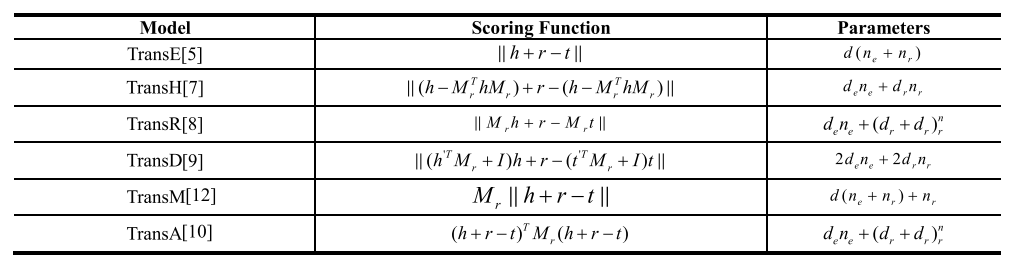

In [1]:
from IPython.display import Image
Image(filename='../images/gats/gats_1.png')

TABLE 1. Scoring function and complexity of proposed translational embedding models. ne and nr represent the number of entities and relations,
respectively. d is the dimension of entity and relation embedding. h, r, t represent the head entity, relation, and tail entity embedding, respectively, Mr
represents the relation transitional matrices, I denotes the identity matrix.

## III. APPROACH

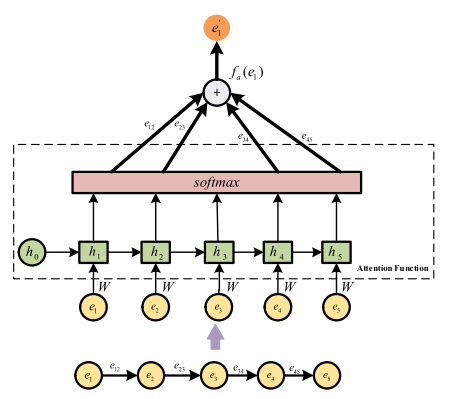

In [2]:
Image(filename='../images/gats/gats_2.png')

FIGURE 2. An example to explain how GATs works. The entity e1
gathers
information from its neighbors and use attention function to assign
different weights to different relations.

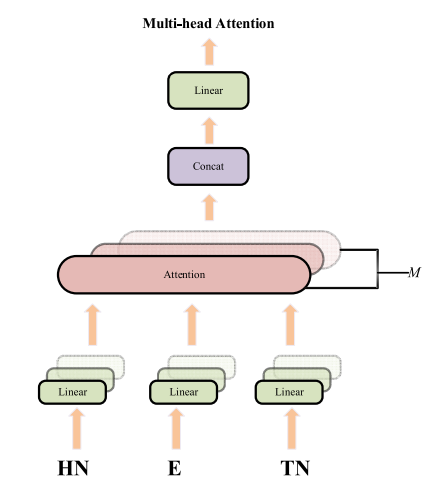

In [4]:
Image(filename='../images/gats/gats_3.png')

FIGURE 3. Multi-Head Attention consists of several attention layers
running in parallel

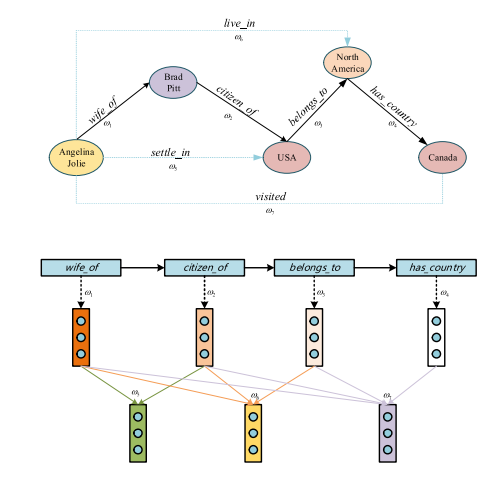

In [5]:
Image(filename='../images/gats/gats_4.png')

FIGURE 4. The figure shows the aggregation process of our graph
attenuated attention layer. wi denotes relative attention values of an
edge. The blue dashed lines represent an auxiliary edge from n-hop
neighbors. The attention weight of node ‘‘Angelina Jolie’’ is
ω1 + 1/2ω2 + 1/3ω3 + 1/4ω4
, in case n = 4.

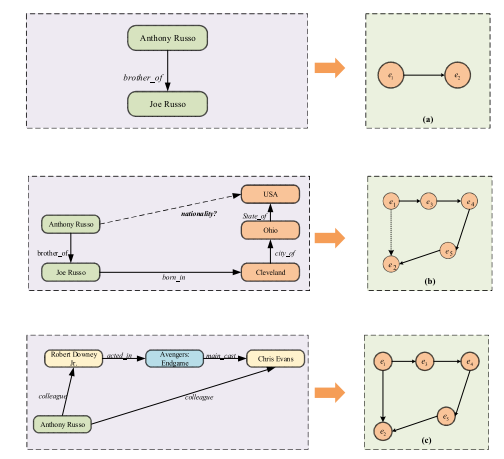

In [6]:
Image(filename='../images/gats/gats_5.png')

FIGURE 5. Three cases for the GAATs model. (a) direct relation between
entities; (b) indirect relation without direct connection; 4(c) indirect
relation with direct connection

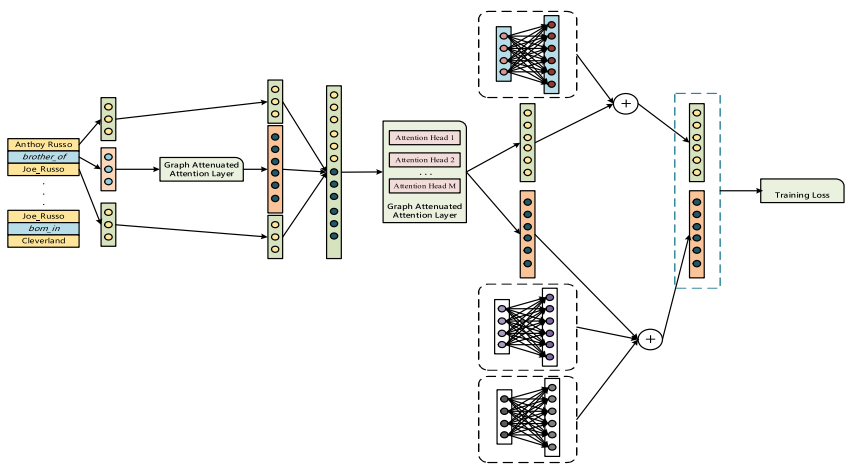

In [7]:
Image(filename='../images/gats/gats_model.png')

FIGURE 6. This figure shows the whole structure of our model. Yellow circles denote initial entity embeddings, blue circles mean
initial relation embeddings, dark yellow and blue circles represent transformed entities and relation embeddings, respectively

## IV. EXPERIMENTS RESULTS AND ANALYSIS

### A. DATASETS

To evaluate our model, we used two benchmark datasets: WN18RR [15] and FB15k-237 [15]. The knowledge graph completion task mainly consists of link prediction and triple classification. In addition, in order to testify the performance of our model, our apply a task named relation prediction to make sure our model can handle the inference of relations. The research shows that when the link prediction task is performed on the datasets WN18 and FB15k, it is affected by the inverse relation, which is a simple inverse-rule-based model can be used to obtain optimal results. Therefore, the corresponding sub-datasets WN18RR and FB15k-237 are used to solve the problem of the reversible relation between the datasets [27]. We use the dataset partitioning method to divide the training set and the test set. Table 2 provides all the information we use for the datasets.

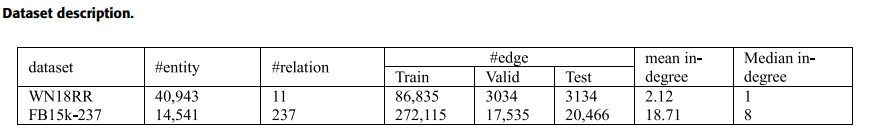

In [16]:
Image(filename='../images/gats_datadesc.png')

Table 2 : Dataset description

### A. Tập dữ liệu

Để đánh giá mô hình của chúng tôi, chúng tối sử dụng hai tập dữ liệu chuẩn. WN18RR và FB15k-237. Nhiệm vụ hoàn thiện đồ thị tri thức chủ yếu bao gồm dự đoán liên kết và phân loại bộ ba. Ngoài ra, để mà test hiệu năng của mô hình chúng tôi, một nhiệm vụ áp dụng của chúng tôi gọi là  relation prediction để đảm báo mô hình có thể handle suy luận của mối quan hệ. Nghiên cứu chỉ ra rằng khi sử dụng tác vụ dự đoán liên kết thực được thi trên tập dữ liệu WN18 và FB15k, nó ảnh hưởng bởi mối quan hệ đảo nghịch, những cái mà có thể sử dụng mô hình inverse-rule-based (luật đảo ngược cơ sở) đơn giản có thể được sử dụng để đạt được kết quả tối ưu. Vì vậy, tập dữ liệu đã được hiệu chỉnh WN18RR và FB15k-237 được sử dụng để giải quyết vấn đề trên mối quan hệ đảo ngược giữa tập dữ liệu. Chúng tôi sử dụng phương pháp chia nhỏ tập dữ liệu thành tập tranining và test. 

### B. EVALUATION PROTOCOL

The goal of the link prediction task is to predict a golden triple when the head or tail entity is missing, i.e., given $(r_k,e_j)$ to predict $e_i$ or given $(e_i,r_k)$ to predict $e_j$. In this task, we remove the head or the tail entity and replace it with all other entities in the corpus. We first calculate the scores of these corrupted triples and rank them in descending order. The ranking of the correct entity is finally recorded. The link prediction emphasizes the final ranking of the correct entity rather than just finding the best entity. Similar to TransE, we also use two methods as our evaluation strategy: MeanRank (MR) and the proportion of the top N correct entities (Hit@N), N = 1,3,10. In addition, we also use the Mean Reciprocal Rank (MRR) commonly used in information retrieval as another strategy for evaluation. The lower MR values and the higher MRR or Hit@N values demonstrate better accuracy performance of the model [23]. We call this evaluation method ‘‘Raw’’. Note that there may also be corrupted triples in the KG, and these corrupted triples will be considered as the correct triples. Therefore, before ranking, we should delete the corrupted triples contained in the training set, the validation set, and the test set. This evaluation method is called ‘‘Filter’’. In this article, we summarize the evaluation results of using the two methods, ‘‘Raw’’ and ‘‘Filter’’.

Mục tiêu của nhiệm vụ dự đoán liên kết là dự đoán một bộ ba vàng khi thực thể head hoặc tail bị thiêu. Ví dụ cho $(r_k, e_j)$ để dự đoán $e_i$ hoặc cho $(e_i, r_k)$ để dự đoán $e_j$. Trong nhiệm vụ này, chúng tôi laoij bỏ thực thể head hoặc tail và thay nó bằng tất cả những thực thể khác trong [corpus](http://viet.jnlp.org/tai-nguyen-ngon-ngu-tieng-viet/khai-yeu-ve-corpus) (Kho dữ liệu). Đầu tiên chúng tôi tính toán điểm số của những bộ ba hỏng và xếp loại chung theo thứ tự giảm dần. Xếp loại của thực thể đúng thì cuối cùng được ghi lại. Dự đoán liên kết nhấn mạnh vào xếp hạng cuối cùng của thực thể đúng hơn là tìm ra thực thể đúng nhất. Tương tự như TransE, chúng tôi sử dụng hai phương pháp để đánh giá chiến lược : MeanRank (MR) và tỉ lệ top N thực thể đúng (Hit@N), N=1,3,10. Ngoài ra, chúng tôi sử dụng Mean Reciprocal Rank (MRR - Trung Bình Đối ứng) phổ biến được sử dụng cho truy vấn thông tin như là như là một chiến lược khác cho đánh giá. MR càng thấp và MRR càng vào hoặc giá trị Hit@N  càng cao thì càng chứng minh kết quả tốt hơn  của mô hình. Chúng tôi gọi phương pháp đánh giá "Raw". Ghi chú là bên cạnh đó còn có bộ ba bị hỏng trong đồ thị và những bộ ba bị hỏng này được cân nhăc như là một bô ba đúng. Vì vậy, trước khi xếp hạng, chúng tôi nên xóa ba bộ ba hỏng trong tập training và validation và test. Phương pháp đánh giá này gọi là "Filter". Trong bài viết này, chúng tôi tóm lại kết quả đánh giá sử dụng "Raw" và "Filter"

Raw : chỉ dùng bình thường
Filter : đã xóa các bộ ba hỏng

### C. TRAINING PROTOCOL

We create two sets of corrupted triples using the method of replacing the head or tail entity of a golden triple. One of them is a collection that replaces only the header entities, and the other is a collection that replaces only the tail entities [26]. To ensure the robustness of the link prediction, we use the classical Bernoulli sampling method, and the two sets extract an equal number of corrupted triples as training samples.

We use the TransE method to initialize the entity embedding matrix and the relation embedding matrix. First, we use the GAATs model to train the embedding of entities and relations in the datasets., and then we train a decoder CapsE to complete our link prediction task. The attenuated attention mechanism is introduced while joining the n-hop neighbor. We use the Adam optimizer to determine the values for all of the parameters. Among them, the initial learning rate is set to $λ = {0.001,0.01,0.1}$, the embedding dimension of the entity and relation is set to $k = {50,100,150,200}$, and the margin is set to $γ = {1,2,10}$. The optimal parameters are configured as: $λ = 0.01, k = 100, γ = 2$ on the WN18RR dataset; $λ = 0.01, k = 100, γ = 1$ on the FB15k-237 dataset

Chúng tôi tạo hai tập bộ ba hỏng sử dụng phương pháp thay thế bô ba thực thể head và tail. Một trong số chúng là một bộ mà chỉ thay thế thực thể header, và những bộ khác chỉ thay thế thực thể tail. Để tăng tốc quá trình dự đoán, chúng tôi sử dụng phương pháp lấy mẫu ngẫn nghiên theo phân phối Bernoulli, và sử dụng hai tập trích xuất một số lượng bằng nhau các bộ ba hỏng như là mẫu huấn luyện.

Chúng tôi sử dụng phương pháp TransE để khởi tạo bằng cách nhúng thực thể ma trận. Đầu tiên, chúng tôi sử dụng mô hình GAATs để huấn luyện thực thể nhúng và mối quan hệ trong cơ sở dữ liệu, và sau đó chúng tôi huấn luyện decoder CapsE để hoàn thiện nhiệm vụ dự đoán liên kết của chúng tôi. Cơ chế suy giảm chú ý thì được giới thiệu trong khi ghép n-hop hàng xóm. Chúng tôi sử dụng hàm tối ưu Adam để xác định giá trị của tất cả tham số. Trogn só đó, tỷ lệ learning rate được gán cho $λ = {0.001,0.01,0.1}$, Tham số tối ưu được cấu hình là : $λ = 0.01, k = 100, γ = 2$ trên tập WN18RR; $λ = 0.01, k = 100, γ = 1$ trên tập FB15k-237

### D. RESULT AND ANALYSIS

We have selected eight current, state-of-the-art methods: DisMult, ConvE, CapsE, TransE, TransH, ConvKB, R-GCN, and n-hop-GATs. Table 3 and Table 4 compares the results of our model experiments with the state-of-the-art results published previously using the same evaluation protocol. The experimental results show that our model performs better than the state-of-the-art method in Hit@N on WN18RR; the performance is better than the state-of-the-art method on FB15k-237. In particular, our Hit@N has increased by 3% overall on the FB15k-237. The results also show that all of the indicators of ‘‘Filter’’ are better than those for the ‘‘Raw’’ method.



Chúng tôi đã sử dụng 8 phương pháp state-of-the-art : DisMult, ConvE, CapsE, TransE, TransH, ConvKB, R-GCN, and n-hop-GATs
    
Bảng 3 và 4 so sánh kết quả của thực nghiệm của mô hình chúng tôi với kết quả state-of-the-art so với trước đó sử dụng cùng phương thức đánh giá. Kết quả thực nghiệm chỉ ra rằng mô hình của chúng tôi thực hiện tốt hơn phương pháp state-of-the-art trên Hit@N trên WN18RR; hiệu quả thì tốt hơn phương pháp state-of-the-art trên tập FB15k-237. Cụ thể, điểm Hit@N đã tăng 3% tổng thể trên FB15k-237. Kết quả đồng thời cũng chỉ ra rằng tất cả chỉ tiêu của "Filter" là tốt hơn so với phương pháp "Raw"

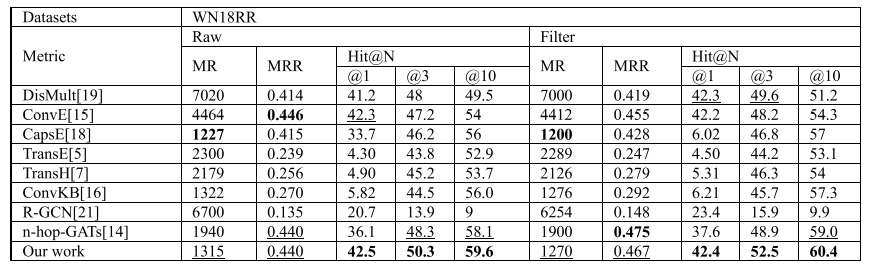

In [22]:
Image(filename='../images/gats_table3.png')

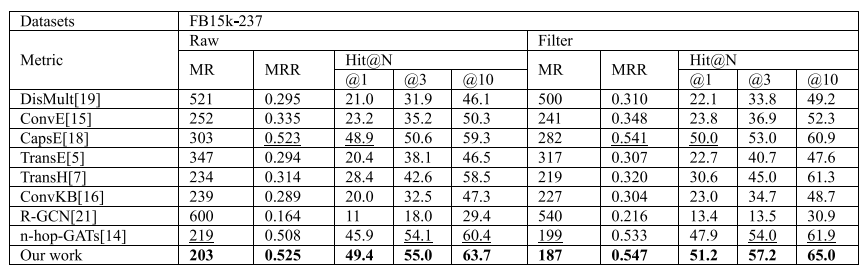

In [23]:
Image(filename='../images/gats_table4.png')

From Table 3 and Table 4, we know that:

1. Compared to the matrix decomposition model DisMult, the proposed GAATs model uses the neural network to mine the deep features of the triples to extract more feature information in the link prediction task. Therefore, all indicators for the proposed method are higher than the matrix decomposition method;

2. Compared to the translational model (TransE, TransH), since the core of the translational model is $h + r ≈ t$ for golden triples, which ignores the features of the triple itself, the proposed GAATs model emphasizes $h + r ≈ t$ with adding attention mechanisms. The graph model has been introduced under the premise of the neural network,and the n-hop neighbors of the triples have been found, which enriches the meaning of the triple. Consequently, the experimental results for the proposed model are better than the translation models.

3. Compared to the neural network models (ConvE, ConvKB, R-GCN, CapsE), the proposed GAATs model applies the encoder-decoder model, which uses two different neural network structures to describe the features of the triples. In particular, CapsE acts as a decoder to discover the hidden features of the triples so that the proposed model performs better than the neural network models.

4. Finally, compared to the n-hop-GATs, the proposed GAATs model introduces an attenuated attention mechanism, which emphasizes the closer the relation to a given entity is, the higher the attention weight obtains. In addition, we replace the ConvKB with CapsE, so that the proposed model performance is also better.

5. The results also show that the performance on the WN18RR dataset is lower than on the FB15k-237 dataset. The main reason is that there are fewer types of relations on WN18RR and there are fewer intermediate paths in the relation, which can not take advantage of our model.

For each relation r on FB15k-237, we calculate the average number $n_h$ of head entities per tail entity and the average number $n_t$ of tail entities per head entity [24]. If $n_h < 1.5\& \&n_t < 1.5$, r is classified as one-to-one (1-1). If $n_h < 1.5\& \&n_t ≥ 1.5$, r is classified as one-to-many (1-M). If $n_h ≥ 1.5\& \&n_t < 1.5$, r is classified as many-to-one (M-1). If $n_h ≥ 1.5\& \&n_t ≥ 1.5$, r is classified as many-to-many (M-M).

Trong bảng 3 và 4 chúng tôi thấy rằng:

1. So với mô hình rời rạc hóa ma trận DisMult, mô hình đề xuất GAATs sử dụng mạng neron để đào đặc trưng sâu của bộ ba đề trích xuất nhiều thông tin đặc trưng hơn trong quá trình dự đoán liên kết. Vì vậy tất cả chỉ tiêu cho phương pháp đề xuất đều cao hơn phương pháp rời rạc hóa ma trận.

2. So với mô hình chuyển đổi hóa (TransE, TransH), điểm cốt yếu của mô hình chuyển chuyển đổi hóa là  $h + r ≈ t$ cho bộ ba vàng, mà lờ đi những đặc trưng của bộ ba chính nó, mô hình đề xuất GAATs nhấn mạnh rằng $h + r ≈ t$ với thêm một cơ chế chú ý (attention mechanisms). Mô hình đồ thị đã được giới thiệu trên tiền đề của mạng neron, và hàng xóm n-hop của bộ ba đã được tìm thấy, cái mà làm tăng thêm ý nghĩa của bộ ba. Hậu quả là kết quả thực nghiệm cho mô hình đề xuất tốt hơn trên mô hình chuyển đổi hóa

3. So với mô hình mạng neron (ConvE, ConvKB, R-GCN, CapsE), mô hình đề xuất GAATs áp dụng mô hình encoder-decoder mà sử dụng mạng hai cấu trúc mạng neron để mô tả đặc trưng của bộ ba. Cụ thể hơn, CapsE hành xử như là decoder để khám phá ra những đặc trưng ẩn của bộ ba vì vậy phương pháp đề xuất thực hiện tốt hơn mô hình mạng neron.

4. Cuối cùng, so với n-hop-GATs, mô hình đề xuất GAATs giới thiệu một cơ chế chú ý, mà nhận mạnh gần hơn đến mối quan hệ được thực thể là chứa trọng số cao của trong số chú ý. Ngoài ra, chúng tôi thay ConvKB với CapsE, vì vậy mô hình đề xuất cũng thực hiện tốt hơn.

5. Kết quả chỉ ra rằng hiệu xuất trên tập WN18RR thì tập hơn trên tập FB15k-237. Lý do chính là vì có ít hơn loại quan hệ trên tập WN18RR và sẽ có hơn đường đi trung gian trong quan hệ, mà có thể là lợi thể của mô hình chúng tôi.

Với mỗi quan hệ r trên tập FB15k-237, chúng tôi tính toán trung bình số $n_h$ cho head entities trên tail entity và trung bình số $n_t$ của tail entities trên head entity.

If $n_h < 1.5\& \&n_t < 1.5$, r là phân loại (1-1)

Nếu $n_h < 1.5\& \&n_t ≥ 1.5$, r là phân loại 1 nhiều (1-M)

Nếu $n_h ≥ 1.5\& \&n_t < 1.5$, r là phân loại nhiều 1 (M-1)

Nếu $n_h ≥ 1.5\& \&n_t ≥ 1.5$ , r là phân loại nhiều nhiều (M-M)

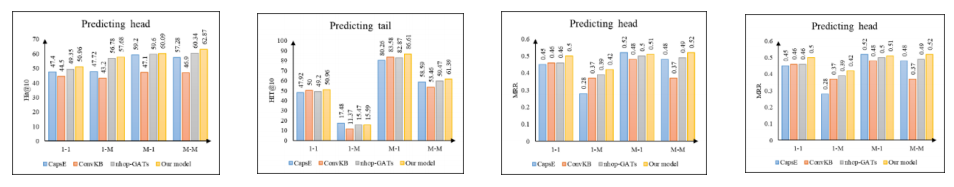

In [24]:
Image(filename='../images/gats_7.png')

FIGURE 7. Hit@10 (in percentage) and MRR on the FB15k-237 test set w.r.t each relation category.

Figure 7 shows Hits@10 and MRR results for predicting the head and tail entities of each relation category on FB15k237. The experimental results show that our model in 
‘‘side1’’ (i.e., predicting head entities in 1-1 and 1-M; predicting tail entities in 1-1 and M-1) and 
‘‘sideM’’ (i.e., predicting head entities in M-1 and M-M; predicted tail entities in 1-M and M-M) have good performance.

The main reasons are: 

1. We provide an embedding representation for each triple, making the representation of the triple more precise, and the discrimination between the triples is higher. so compared to other models, our model has better performance; 

2. The proposed attenuated attention mechanism makes the relation learned by each triple differently, so when making predictions, whether $(r_k,e_j)$ or $(e_i,r_k)$, they can still learn different representations, so the results are more accurate when ranking.

3. The n-hop neighbors of a given triple in the encoder of our model replaces the embedding representation of the triple itself so that the triple carries more features and the decoder applies the CapsE instead of max-pooling ConvKB to ensures that the triple features are not lost. Based on this, the generalization ability of the model is further improved.

Hình 7 chỉ ra rằng Hit@10 và kết quả MRR cho dự đoán head và tail entites của mỗi danh mục quan hệ trong FB15k237. Kết quả thực nghiệm chỉ ra rằng mô hình của chúng tôi trong 

"side1" (ví dụ dự đoán head entities trong quan hệ 1-1 hoặc 1-M; dự đoán tail entities trong 1-1 hoặc 1-M) và 

"SizeM" (Ví dụ dự đoán head entities trong quan hệ M-1 hoặc M-M; dự đoán tail entities trong M-1 hoặc M-M) có hiệu xuất quả tốt

Lý do chính là :

1. Chúng tôi cung cấp một hiểu diễn nhúng cho mỗi bộ ba, làm cho biểu sự biểu diễn của bộ ba tỉ mỉ hơn, và đối xử giữa các bộ ba cao hơn. Vì vậy so với những mô hình khác mô hình của chúng tôi có hiệu xuất cao hơn.

2. Cơ chế suy giảm chú ý đề xuất làm cho mối quan hệ học bởi từng mộ ba khác nhau, vì vậy khi dự đoán, dù là $(r_k,e_j)$ hay $(e_i,r_k)$, chúng vẫn có thể học các biểu diễn khác nhau, vì vậy kết quả chính xác hơn khi xếp hạng

3. Hàng xóm n-hop của bọ ba đưa ra trong encoder của mô hình chúng tôi thay thế bằng biểu diễn nhúng của bộ ba chính nó vì vậy bộ ba mang nhiều đặc trưng hơn và decoder áp dụng cho CapsE thay vì Max-Pooling ConvKB để bảo đảm rằng đặc trưng bộ ba không bị mất đi. Dựa trên điều này, khả năng khái quát hóa của mô hình được cải thiện hơn nữa.

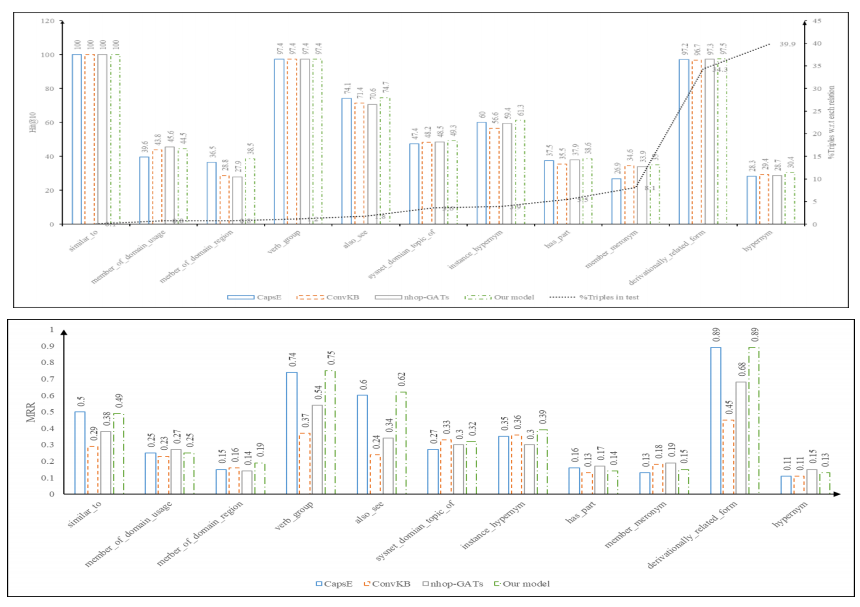

In [25]:
Image(filename='../images/gats_9.png')

FIGURE 8. Hit@10 (in percentage) and MRR on the WN18RR test set w.r.t each relation category. The right y-axis is the percentage of
triples corresponding relations

Figure 8 shows the results for Hits@10 and MRR on
WN18RR.*also_see,similar_to,derivationally_related_form, verb_group* can all be regarded as M-M relations, and our model performs better than others.

Hình 8 ta thấy kết quả cho Hits@10 và MRR trên tập WN18RR. *also_see,similar_to,derivationally_related_form, verb_group* có thể tất là liên quan đến quan hệ M-M, và mô hình của chúng tôi tốt hơn những cái khác

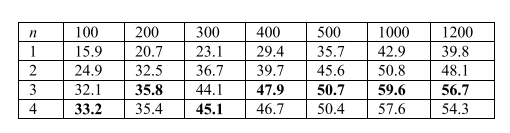

In [27]:
Image(filename='../images/gats_8.png')

Meanwhile, we study the value of n-hop neighbors and the effect of the number of iterations on the final result. Table 5 shows the value of the validation set Hit@10 of WN18RR when the number of iterations and the value of n change. When n = 3 and epochs = 1000, the model works best. We can see that as the training progresses, our model collects more information from the neighbors, which focuses more on the direct neighbor and gets secondary information from the far neighbor. Once the model converges, it learns to collect multi-hop and cluster relation information from the node n-hop neighbors. However, when n > 3, the effect of the model will decrease. This also implies that the farther away from the relation, the lower the attention value obtained. When n = 4 or more, the neighbor nodes are no longer important.

Trong khi đó, chúng tôi nghiên cứu giá trị của n-hop hàng xóm và ảnh hưởng của những con số của iterations(lượt duyệt) trên kết quả cuối cùng. Bảng 5 chỉ ra giá trị của tập validation Hit@10 của WN18RR khi số lượng duyệt và giá trị của n thay đổi. Khi n = 3 và epochs = 1000, thì mô hình làm việc tốt nhất. Chúng ta có thể nhìn thấy rằng quá trình training, mô hình của chúng tôi thu thập nhiều thông tin từ những người hàng xóm, mà tập trung nhiều hơn vào hàng xóm trực tiếp và lấy thông tin nhị cấp từ những hàng xóm xa. Một khi mô hình hội tụ, nó có thể thu thập multi-hop(nhiều bước) và phân loại thông tin quan hệ từ node n-hope hàng xóm. Tuy nhiên, khi n > 3, thì ảnh hưởng của mô hình đã giảm. Điều này đồng thời ẩn ý là càng càng xa mối quan hệ thì giá trị chú ý càng có càng giảm. Khi n = 3 hoặc lớn hơn, thì node hàng xóm sẽ không còn quan trọng nữa.

### E. RELATION PREDICTION

Relation prediction requires two steps: the discovery of a pair of entities with potential relation, and the reasoning of potential relations.Our experiment assumes that an entity pair with a potential relation has been recognized. i.e., given $(e_i,e_j)$ to predict $r_k$.

We drop the relations of the triples in the test data, reasoning the relations based on the embeddings of the trained entities and relations, and comparing it with the standard answer to calculate the accuracy.Besides,we apply Precision,
Recall, and F-Measure in machine learning algorithms
For each pair of entities, we traverse all the relations into a triple. For each triple, we calculate the distance d betweent the embedding vector from the head entity and the relation to the tail entity. The smaller the distance $d(h + r,t)$, the greater the possibility that the triple is established.We record the relations of top 10 triples for each pair of entities in ascending order of the distance $d(h + r,t)$. We record the Hit@10 and Hit@1 of the correct relations as the accuracy rate, and record the recall rate and calculate the F-Measure. The experimental results are shown in Table 6 and Table 7.

Dự đoán mối quan hệ bao gồm hai giai đoạn: khám pha ra những cặp với mối quan hệ tiềm năng và suy đoán cho tiềm năng của mối quan hệ. Giả định thực nghiệm rằng một cặp thực thể với quan hệ tiềm năng đã được nhận dạng Ví dụ cho $(e_i, e_j)$ để dự đoán $r_k$.

Chúng tôi drop mối quan hệ của bộ ba trong dữ liệu test,  suy ra mối quan hệ dựa vào nhúng của những thực thể và mối quan hệ của huấn luyện, và so sánh nó với câu trả lời tiêu chuẩn để tính toán độ chính xác. Bên cạnh đó chúng tôi áp dụng Precision, Recall, và F-Measure trong thuật toán ML. 
Cho mỗi cặp của thực thể, chúng tôi duyệt qua tất cả mối quan hệ vào một bộ ba. Mỗi bộ ba, chúng tôi tính toán khoảng cách $d$ giữa vector nhúng từ thực thể head và mối quan hệ với tail entity. Khoảng cách  $d(h + r,t)$ càng nhỏ, thì khả năng cao hơn của bộ ba được established(củng cố. , thiết lập). Chúng tôi lưu lại mối quan hệ của top 10 cho mỗi cặp entities theo thứ tự tăng dần khoảng cách $d(h + r,t)$. Chúng tôi lưu lại Hit@10 và Hit@1 của mối quan hệ đúng như là tỷ lệ chính xác, và lưu lại tỷ lệ recall và tính toán F-Measure. Kết quả thực nghiệm show trong bảng 6 và 7.

From Table 6 and Table 7, we know that:

1. On the WN18RR and FB15k-237 datasets, our model has achieved good result in relation prediction. Because there are only 11 kinds relations in WN18RR, and FB15k-237 contains 237 kinds of relations, the model has better effect on simple dataset WN18RR than the complex one FB15k-237.

2. Since our model has independently embedded of relations and incorporates the distance information of the relations in the entity embedding, our model is better than the state-of-the-art models in most cases. Among them, the translational models(TransE/TransH) perform the worst. Because they only models the relations by optimizing $h + r ≈ t$, and obviously ignores the semantic information of the relations. Our model adds an attenuated attention mechanism based on n-hop-GATs, so that each relation can obtain different weights according to the distance of the path, and solve the probem that n-hop-GATs does not separately embed the relations. Our model uses CapsE as a decoder and uses GAATs as an encoder to further mine the semantic information of the relations to prove the performance of relation prediction.

3. The experimental results also show the importance of separate embedding of relations in relation prediction. In order to ensure the accuracy of the relation prediction, the independent effect of the relationship embedding is far better than the auxiliary information embedded only as the entity.

Từ bảng 6 và 7, chúng ta thấy rằng:

1. Trên tập WN18RR và FB15k-237, mô hình của chúng tôi đạt kết quả tốt trong dự đoán liên kết. Bởi vì 11 loại quan hệ trong WN18RR và FB15k-237 bao gồm 237 loại quan hệ, mô hình có thể tốt hơn ảnh hưởng bởi tập dữ liệu đơn giản WN18RR hơn là cái phức tạp là FB15k-237.

2. Khi mô hình của chúng tôi nhúng đọc lập mối quan hệ và kết hợp với thông tin khoảng cách của mối quan hệ trong thực thể nhúng, mô hình của chúng tôi tốt hơn mô hình state-of-the-art trong hầu hết các trường hợp. Trong số đó, mô hình chuyển đổi hóa (TransE, TransH) thể hiện tốt nhất. Bởi vì bọn họ chỉ sử dụng mô hình quan hê bằng cách tối ưu $h + r ≈ t$ và chắc chắn bỏ qua thông tin ngữ nghĩa của mối quan hệ. Mô hình của chúng tôi thêm một cơ chế suy giảm chú ý dựa trên n-hop-GATs, vì vậy mối quan hệ có thể chứa nhiều trong số khác nhau theo khoảng cách của đường đi, và giải quyết vấn đề là n-hop-GATs không tách biệt mối quan hệ nhúng. Mô hình của chúng tôi sử dụng CapsE như là decoder và sử dụng GAATs như là encoder để khai thác thêm thông tin ngữ nghĩa của mối quan hệ để chứng minh hiệu suất của dự đoán mối quan hệ. 

3. Kết quả thực nghiệm cũng chỉ ra rằng sự quan trọng của tách biệt nhúng của quan hệ trong **relation prediction**dự đoán quan hệ. Để mà đảm bảo độ chính xác của dự đoán mối quan hệ, sự độc lập ảnh hưởng của mối quan hệ nhúng là tốt xa hơn là thông tin nhúng thích hợp chỉ như là một thực thể.

### F. TRIPLE CLASSIFICATION

The task of triple classification is to determine whether a given triple $(e_i,r_k,e_j)$ is a golden triple or not, which is a binary classification task. We use the WN18RR and FB15k237 datasets for these experiments as well. We create two corrupted triple sets as presented in Section IV.B for the triple classification experiment.

For the triple classification task, we set a threshold $δ_r$ for each relation, which is obtained by maximizing the classification accuracy of the validation set. Given a triple $(e_i,r_k,e_j)$, if its score is greater than $δ_r$, it is classified as a golden triple, otherwise it is classified as corrupted [25].

We choose TransE, TransH, TransR, TransD, ConvKB,and n-hop-GATs as our baseline methods. In this experiment, we select ADADELTA SGD as our optimization goal. We choose the margin $γ = {1,2,5,10}$, entity and relation embedding dimensions $k = {50,100,150,200}$, and minibatch size $B = {100,200,500,1000}$. After our experiments, the optimal parameters of the validation set are $k = 100, γ = 2, B = 1000$ on WN18RR; $k = 100, γ = 1, B = 100$ on FB15k-237.
For the two datasets, we testify the task by using 1000 iterations. The experimental results are presented in Table 8. Table 8 shows that in WN18RR and FB15k-237, the accuracy of the triple classification of the proposed GAATs model is higher than the other models. 

Nhiệm vụ của phân loại bộ ba là để xác định một bộ ba $(e_i,r_k,e_j)$ là một bộ ba vàng hay không, điều mà là một nhiệm vụ phân loại nhị phân. Chúng tôi sử dụng WN18RR và FB15k237 cơ sở dữ liệu cho thực nghiệm này nữa. Chúng tôi tạo hai tập bộ ba hỏng như là biểu diễn trong Section IV B cho thực nghiệm phân loại bộ ba

Cho nhiệm phụ phân loại bộ ba, chúng tôi gán một threadhold  $δ_r$ cho mỗi mối quan hệ, cái mà chứa độ lớn nhất hóa (maximizing) độ chính xác phân loại của tập validation. Cho một bộ ba  $(e_i,r_k,e_j)$, nếu điểm số của nó lớn hơn $δ_r$, thì nó là bộ ba phân loại vàng, ngược lại thì nó phân loại lỗi.

Chúng tôi chọn TransE, TransH, TransR, TransD, ConvKB và n-hop-GATs như là phương pháp cơ sở của chúng tôi. Trong thực nghiệm này, chúng tôi chọn ADADELTA SGD cho hàm tối ưu. Chúng tôi chọn margin $γ = {1,2,5,10}$, miền nhúng quan hệ và thực thể $k = {50,100,150,200}$ và minibatch size $B = {100,200,500,1000}$. Sau thực nghiệm của chúng tôi, tham số tối ưu cho tập validation là $k = 100, γ = 2, B = 1000$ trên WN18RR; $k = 100, γ = 1, B = 100$ trên FB15k-237.

Cho hai tập dữ liệu, chúng tôi kiệm nghjeem bằng 1000 lượt duyệt . Kết quả thực nghiệm được thể hiện trong bảng 8. Bảng 8 thể hiện WN18RR và FB15k-237, độ chính xác của phân loại bộ ba của mô hình đề xuất GAATs là cao hơn những phương pháp khác.

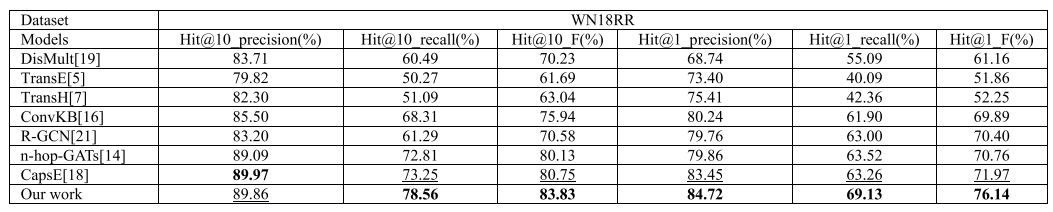

In [29]:
Image(filename='../images/gats_10.png')

TABLE 6. Experimental results on the MN18RR test set. The best score is in bold and second-best score is underlined

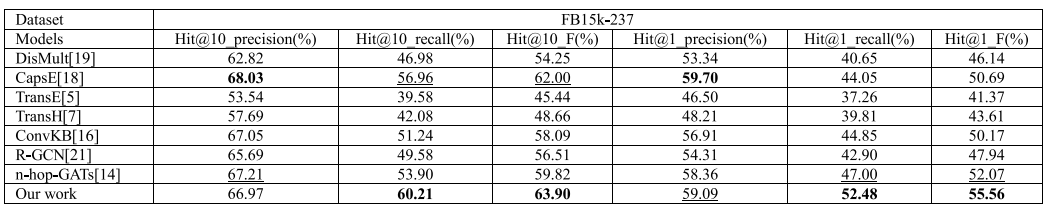

In [30]:
Image(filename='../images/gats_11.png')

TABLE 7. Experimental results on the FB15k-237 test set. The best score is in bold and second-best score is underlined

The main reasons are: 

1. The translational models (TransE, TransH, TransR, TransD) first randomly initialize the representation of entities and relations, and then represent the embedding of entities and relations based on $h+r ≈ t$. The initial embedding is further optimized using a neural network, so our model representation is better than the translational models; 

2. ConvKB method uses a CNNs to extract the features of the triple, as a decoder in the n-hop-GATs model. Although the hidden features of the triples can be found, it is easy to lose features using the pooling method. 

3. Compared with the n-hopGATs model, the proposed GAATs model first introduces the attenuated attention mechanism, and then the decoder adopts the more advanced CapsE model, so the accuracy is further improved.

Lý do chính là :

1. Mô hình chuyển đổi hóa (TransE, TransH, TransR, TransD) đầu tiên khởi tạo ngẫu nhiên sự biểu diễn của mối quan hệ và thực thể, và sau đó biểu diễn thực thể nhúng và quan hệ dựa trên $h+r ≈ t$. Nhúng khởi tạo thì được tối ưu hơn nữa sử dụng mạng neron, đồng thời sử dụng mô hình của chúng tôi biểu diễn thì tốt hơn mô hình translational

2. Phương pháp ConvKB sử dụng CNNs để trích xuất đăc trưng của bộ ba, như là decoder trong mô hình n-hop-GATs. Mặc dù đặc trưng ẩn của bộ ba có thể tìm thấy, nó khá dễ để mất các đặc trưng sử dụng phương pháp pooling.

3. So với mô hình n-hop-GATs, mô hình đề xuất GAATs đầu tiên giới thiệu cơ chế suy giảm chú ý và sau đó decoder hấp thụ mô hình tiên tiến CapsE, vì vậy độ chính xác cải thiện hơn nữa.

## V. CONCLUSION

We propose the GAATs model, which applys an attenuated attention mechanism into the representation of relations and entities to obtain new embeddings on both entities and relations. In addition, we use the CapsE as our decoder, avoiding the loss of features exhibited by the ConvKB. Therefore, our model takes the diversity of triples into account. An extensive experiment shows that our method is more effective than the state-of-the-art methods in link prediction, triple classification and relation prediction.
However, our model has a high computational complexity due to the graph feature extraction, and time cost arising from representing each triple separately. How to improve the efficiency of the graph feature extraction is an urgent problem to be solved. In addition, the temporal and spatial attributes for dynamic KGs also need to be studied as the next research goal.


Chúng tôi đề xuất mô hình GAATs, mà có thể ứng dụng vào cơ chế suy giảm chú ý vào biểu diễn mối quan hệ và thực thể để chứa thông tin nhúng mới trên cả entities và relation. Ngoài ra, chúng tôi sử dụng CapsE như là decoder, tránh mất các đặc trưng biểu diễn trong ConvKB. Vì vậy mô hình của chúng tôi tính đến sự đa dạng của bộ ba. Một kết quả thực nghiệm mở rộng chỉ ra rằng phương pháp của chúng tôi thì hiệu quả hơn phương phương state-of-the-art trong link prediction, triple classification and relation prediction. Tuy nhiên, mô hình của chúng tôi phải tính toán phức tạp theo sự trích xuất đặc trưng đồ thị và chi phí thời gian phát sinh từ biểu diễn bộ ba tách biệt. Làm sao để cải tiến hiêu quả của trích xuất đặc trưng độ thị là một vấn đề cấp thiết càn phải giải quyết. Ngoài ra, theo đặc tính thời gian (temporal) và không gian của đồ thị tri thức động cũng cần được tìm hiểu như là mục tiêu nghiên cứu tiếp theo.